In [167]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [168]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-10-03 14:50:43--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: 'AER_credit_card_data.csv.2'

     0K .......... .......... .......... .......... .......... 69% 41.8K 1s
    50K .......... .......... .                               100% 26.6M=1.2s

2022-10-03 14:50:45 (59.8 KB/s) - 'AER_credit_card_data.csv.2' saved [73250/73250]



In [169]:
df = pd.read_csv('AER_credit_card_data.csv')
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [170]:
df.head().T

,0,1,2,3,4
card,yes,yes,yes,yes,yes
reports,0,0,0,0,0
age,37.66667,33.25,33.66667,30.5,32.16667
income,4.52,2.42,4.5,2.54,9.7867
share,0.03327,0.005217,0.004156,0.065214,0.067051
expenditure,124.9833,9.854167,15.0,137.8692,546.5033
owner,yes,no,yes,no,yes
selfemp,no,no,no,no,no
dependents,3,3,4,0,2
months,54,34,58,25,64


In [171]:
df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [172]:
df['default'] = (df.card == 'default').astype(int)


In [173]:
df.card = (df.card == 'yes').astype(int)

In [174]:
df.card.head()

0    1
1    1
2    1
3    1
4    1
Name: card, dtype: int32

In [175]:
df.dtypes

card             int32
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
default          int32
dtype: object

In [176]:
df.head().T

,0,1,2,3,4
card,1,1,1,1,1
reports,0,0,0,0,0
age,37.66667,33.25,33.66667,30.5,32.16667
income,4.52,2.42,4.5,2.54,9.7867
share,0.03327,0.005217,0.004156,0.065214,0.067051
expenditure,124.9833,9.854167,15.0,137.8692,546.5033
owner,yes,no,yes,no,yes
selfemp,no,no,no,no,no
dependents,3,3,4,0,2
months,54,34,58,25,64


In [177]:
numerical = ['age', 'reports', 'income', 'share', 'expenditure', 'months', 'active', 'dependents', 'default' ]

categorical =['owner', 'selfemp', 'dependents', 'majorcards']

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

In [180]:
df_train[numerical]

,age,reports,income,share,expenditure,months,active,dependents,default
0,40.50000,3,4.0128,0.000299,0.00000,12,17,1,0
1,32.33333,1,6.0000,0.000200,0.00000,18,4,4,0
2,29.16667,1,2.2000,0.038205,69.79333,49,7,0,0
3,54.66667,1,7.2900,0.106536,647.20670,78,9,2,0
4,25.00000,0,3.3984,0.000353,0.00000,29,4,2,0
...,...,...,...,...,...,...,...,...,...
786,53.00000,0,2.4500,0.017718,35.67500,3,11,0,0
787,30.58333,2,2.5000,0.000480,0.00000,12,18,0,0
788,24.75000,0,1.8750,0.080708,126.02250,14,1,1,0
789,56.91667,1,3.4838,0.062895,182.09580,540,7,0,0


In [181]:
from sklearn.metrics import roc_auc_score

In [182]:
numerical

['age',
 'reports',
 'income',
 'share',
 'expenditure',
 'months',
 'active',
 'dependents',
 'default']

In [183]:
roc_auc_score(y_train, df_train.age)

0.4759979020592945

In [184]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print(c, auc)

age 0.5240020979407055
reports 0.7166629860689376
income 0.5908049467233478
share 0.989183643423692
expenditure 0.991042345276873
months 0.5294217780967629
active 0.6043173411362006
dependents 0.5327757227773791
default 0.5


In [185]:
features = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]


In [186]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [187]:
features = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

train_dicts = df_train[features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [189]:
roc_auc_score(y_val, y_pred)

0.995171242063847

In [190]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [191]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [192]:
df_scores[::10]

,thresholds,tp,fp,fn,tn
0,0.0,211,53,0,0
10,0.1,210,17,1,36
20,0.2,207,5,4,48
30,0.3,205,5,6,48
40,0.4,205,1,6,52
50,0.5,204,1,7,52
60,0.6,204,1,7,52
70,0.7,204,1,7,52
80,0.8,204,1,7,52
90,0.9,204,0,7,53


In [193]:
df_scores['pre'] = df_scores.tp /(df_scores.tp + df_scores.fp)
df_scores['rec'] = df_scores.tp /(df_scores.tp + df_scores.fn)

In [194]:
df_scores[::10]

,thresholds,tp,fp,fn,tn,pre,rec
0,0.0,211,53,0,0,0.799242,1.000000
10,0.1,210,17,1,36,0.925110,0.995261
20,0.2,207,5,4,48,0.976415,0.981043
30,0.3,205,5,6,48,0.976190,0.971564
40,0.4,205,1,6,52,0.995146,0.971564
50,0.5,204,1,7,52,0.995122,0.966825
60,0.6,204,1,7,52,0.995122,0.966825
70,0.7,204,1,7,52,0.995122,0.966825
80,0.8,204,1,7,52,0.995122,0.966825
90,0.9,204,0,7,53,1.000000,0.966825


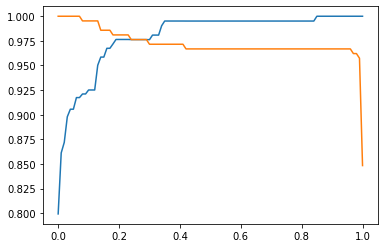

In [195]:
plt.plot(df_scores.thresholds, df_scores.pre)
plt.plot(df_scores.thresholds, df_scores.rec)


In [196]:
df_scores['f1'] = 2 * (df_scores.pre * df_scores.rec) / (df_scores.pre + df_scores.rec)

In [197]:
df_scores[::10].sort_values(by="f1", ascending=False).head(20)

,thresholds,tp,fp,fn,tn,pre,rec,f1
40,0.4,205,1,6,52,0.995146,0.971564,0.983213
90,0.9,204,0,7,53,1.000000,0.966825,0.983133
50,0.5,204,1,7,52,0.995122,0.966825,0.980769
60,0.6,204,1,7,52,0.995122,0.966825,0.980769
70,0.7,204,1,7,52,0.995122,0.966825,0.980769
80,0.8,204,1,7,52,0.995122,0.966825,0.980769
20,0.2,207,5,4,48,0.976415,0.981043,0.978723
30,0.3,205,5,6,48,0.976190,0.971564,0.973872
10,0.1,210,17,1,36,0.925110,0.995261,0.958904
100,1.0,179,0,32,53,1.000000,0.848341,0.917949


In [198]:
df_scores.iloc[df_scores.f1.argmax()]

thresholds      0.350000
tp            205.000000
fp              1.000000
fn              6.000000
tn             52.000000
pre             0.995146
rec             0.971564
f1              0.983213
Name: 35, dtype: float64

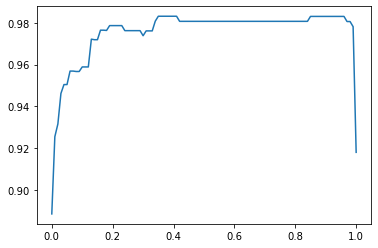

In [207]:
plt.plot(df_scores.thresholds, df_scores.f1)

In [210]:
from sklearn.model_selection import KFold

In [211]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[features].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [212]:
def predict(df, dv, model):
    dicts =df[features].to_dict(orient='records')
    
    x = dv.transform(dicts)
    y_pred = model.predict_proba(x)[:, 1]
    
    return y_pred

In [215]:
scores =[]

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    
for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.card.values
        y_val=df_val.card.values
    
        dv, model = train(df_train, y_train, C=1.0)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))
 
  


0.996 +- 0.003


In [218]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:

    scores =[]
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.card.values
        y_val  = df_val.card.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print('%s: %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
 
  


0.01: 0.995 +- 0.004
0.1: 0.997 +- 0.003
1: 0.996 +- 0.003
10: 0.997 +- 0.003


In [ ]:
C leads to the best mean score - 0.1: 0.997 +- 0.003